In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import cmath

In [132]:
u1 = np.arange(-2, 0, 0.001)
v1 = 0.0*u1
w1 = u1 + 1.0j*v1
u2 = np.arange(0, 2.001, 0.001)
v2 = 0.0*u2
w2 = u2 + 1.0j*v2

In [435]:
uu = np.arange(-3, 3.01, 0.01)
vsteps1 = np.arange(-3, 0, 0.25)
vsteps2 = np.arange(0.25, 3.25, 0.25)
vsteps = np.concatenate((vsteps1, vsteps2))
u_zero_1 = np.arange(-3, -2, 0.001)
u_zero_2 = np.arange(2.001, 3.001, 0.001)

stream_list = []
for v in vsteps:
    stream_list.append((uu, np.zeros(len(uu))+v))
stream_list.append((u_zero_1, np.zeros(len(u_zero_1))))
stream_list.append((u_zero_2, np.zeros(len(u_zero_2))))

w_stream_list = []
for stream in stream_list:
    w_stream_list.append(stream[0] + 1.0j*stream[1])

In [436]:
def f_1_plus(z):
    return 0.5*z + np.sqrt(0.25*z*z-1)
def f_1_minus(z):
    return 0.5*z - np.sqrt(0.25*z*z-1)


(-3, 3)

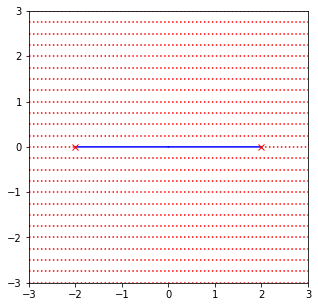

In [437]:
fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.plot(w1.real, w1.imag, 'b-')
ax2.plot(w2.real, w2.imag, 'b-')
for w_stream in w_stream_list:
    ax2.plot(w_stream.real, w_stream.imag, 'r:')
ax2.plot([-2,2],[0, 0], 'rx')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

In [438]:
z_1_plus = np.concatenate((f_1_plus(w1), f_1_minus(w2)))
z_1_minus = np.concatenate((f_1_minus(w1), f_1_plus(w2)))
z_1 = np.concatenate((z_1_plus, np.flip(z_1_minus)))
z_1_stream_list =[]
for w_stream in w_stream_list:
    a_plus = f_1_plus(w_stream)
    b_plus = a_plus[np.abs(a_plus)>1]
    a_minus = f_1_minus(w_stream)
    b_minus = a_minus[np.abs(a_minus)>1]
    z_1_stream_list.append(b_plus)
    z_1_stream_list.append(b_minus)

(-3, 3)

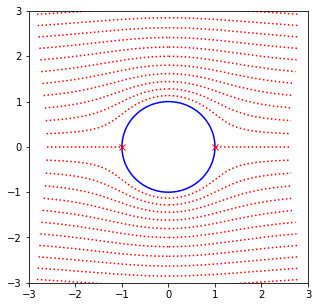

In [439]:
fig3, ax3 = plt.subplots(figsize=(5,5))
ax3.plot(z_1.real, z_1.imag, 'b-')
for z_1_stream in z_1_stream_list:
    ax3.plot(z_1_stream.real, z_1_stream.imag, 'r:')
ax3.plot([-1,1],[0, 0], 'rx')
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)

In [440]:
def f_2(z, alpha, theta):
    return (np.abs(alpha + 1)*z*cmath.exp(1.0j*theta) - alpha)

In [441]:
z_2 = f_2(z_1, 0.2 - 0.2j, 0.0)
z_2_stream_list =[]
for z_1_stream in z_1_stream_list:
    z_2_stream_list.append(f_2(z_1_stream, 0.2 - 0.2j, 0.0))

(-3, 3)

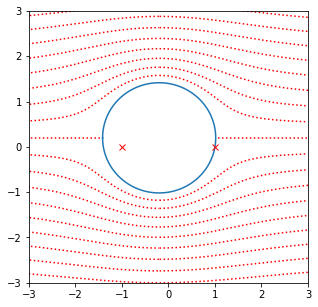

In [442]:
fig4, ax4 = plt.subplots(figsize=(5,5))
ax4.plot(z_2.real, z_2.imag)
ax4.plot([-1,1],[0, 0], 'rx')
for z_2_stream in z_2_stream_list:
    ax4.plot(z_2_stream.real, z_2_stream.imag, 'r:')
ax4.set_xlim(-3, 3)
ax4.set_ylim(-3, 3)


In [443]:
def f_3(z):
    return z + 1/z

In [444]:
z_3 = f_3(z_2)
z_3_stream_list =[]
for z_2_stream in z_2_stream_list:
    z_3_stream_list.append(f_3(z_2_stream))

(-3, 3)

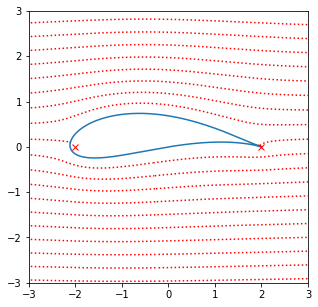

In [445]:
fig5, ax5 = plt.subplots(figsize=(5,5))
ax5.plot(z_3.real, z_3.imag)
for z_3_stream in z_3_stream_list:
    ax5.plot(z_3_stream.real, z_3_stream.imag, 'r:')
ax5.plot([-2,2],[0, 0], 'rx')
ax5.set_xlim(-3, 3)
ax5.set_ylim(-3, 3)


In [446]:
fig2.savefig("AF1.pdf", transparent=True,bbox_inches='tight')
fig3.savefig("AF2.pdf", transparent=True,bbox_inches='tight')
fig4.savefig("AF3.pdf", transparent=True,bbox_inches='tight')
fig5.savefig("AF4.pdf", transparent=True,bbox_inches='tight')